# Data Analysis for IQA models run on SPAQ dataset
### Github repo available @ https://github.com/shmnrr/CS4040_IQA
### SPAQ dataset available @ https://drive.google.com/drive/u/1/folders/1wZ6HOHi5h43oxTe2yLYkFxwHPgJ9MwvT
### Respective NR Benchmark Scores:
* TopIQ NR: PLCC/SRCC: 0.8744/0.8704/0.6716 @ https://github.com/chaofengc/IQA-PyTorch/blob/main/tests/NR_benchmark_results.csv
* TopIQ NR SPAQ: PLCC/SRCC: 0.924/0.921 @ https://arxiv.org/pdf/2308.03060.pdf
* BL: PLCC/SRCC: 0.908/0.909 @ https://ieeexplore.ieee.org/document/9156490

# Models used:
* BL @ https://drive.google.com/file/d/1pXjXAIItViTFs7qUBY-b11WY50mzoVM2/view
* TopIQ NR, TopIQ NR SPAQ @ https://github.com/chaofengc/IQA-PyTorch/tree/main

# Loading data
## IMPORTANT: big part of preprocessing data already done in assess.py
### It's messy but I started this way and had to drag it to the finish line; got lost in the maze at one point

In [115]:
import pandas as pd

base_path = '../results/processed/'

pc_cpu_models = ['BL CPU', 'TopIQ NR CPU', 'TopIQ NR SPAQ CPU']
pc_cuda_models = ['BL CUDA', 'TopIQ NR CUDA', 'TopIQ NR SPAQ CUDA']
android_models = ['BL Mobile', 'TopIQ Mobile', 'TopIQ SPAQ Mobile']
android_emulated_models = ['BL Mobile Emulated', 'TopIQ Mobile Emulated', 'TopIQ SPAQ Mobile Emulated']

# Load the data
results_pc_cpu_df = pd.read_csv(f'{base_path}results_pc_cpu.csv')
results_pc_cuda_df = pd.read_csv(f'{base_path}results_pc_cuda.csv')
results_android_df = pd.read_csv(f'{base_path}results_android.csv')
results_android_emulated_df = pd.read_csv(f'{base_path}results_android_emulated.csv')

# Concatenate all dataframes
all_results_df = pd.concat([results_pc_cpu_df, results_pc_cuda_df, results_android_df, results_android_emulated_df])

# print(all_results_df)

# Separate the data into different variables for each platform
pc_cpu_models = results_pc_cpu_df['model']
pc_cuda_models = results_pc_cuda_df['model']
android_models = results_android_df['model']
android_emulated_models = results_android_emulated_df['model']

# Separate the 'PLCC' values for each platform
pc_cpu_plcc = results_pc_cpu_df['PLCC']
pc_cuda_plcc = results_pc_cuda_df['PLCC']
android_plcc = results_android_df['PLCC']
android_emulated_plcc = results_android_emulated_df['PLCC']

# Separate the 'SRCC' values for each platform
pc_cpu_srcc = results_pc_cpu_df['SRCC']
pc_cuda_srcc = results_pc_cuda_df['SRCC']
android_srcc = results_android_df['SRCC']
android_emulated_srcc = results_android_emulated_df['SRCC']

# Separate the 'Total time sum' values for each platform
pc_cpu_total_time_sum = results_pc_cpu_df['Total time sum']
pc_cuda_total_time_sum = results_pc_cuda_df['Total time sum']
android_total_time_sum = results_android_df['Total time sum']
android_emulated_total_time_sum = results_android_emulated_df['Total time sum']

# Separate the 'Total time mean' values for each platform
pc_cpu_total_time_mean = results_pc_cpu_df['Total time mean']
pc_cuda_total_time_mean = results_pc_cuda_df['Total time mean']
android_total_time_mean = results_android_df['Total time mean']
android_emulated_total_time_mean = results_android_emulated_df['Total time mean']

# Separate the 'Inference time mean' values for each platform
pc_cpu_inference_time_mean = results_pc_cpu_df['Inference time mean']
pc_cuda_inference_time_mean = results_pc_cuda_df['Inference time mean']
android_inference_time_mean = results_android_df['Inference time mean']
android_emulated_inference_time_mean = results_android_emulated_df['Inference time mean']

# Separate the 'Preprocessing time mean' values for each platform
pc_cpu_preprocessing_time_mean = results_pc_cpu_df['Preprocessing time mean']
pc_cuda_preprocessing_time_mean = results_pc_cuda_df['Preprocessing time mean']
android_preprocessing_time_mean = results_android_df['Preprocessing time mean']
android_emulated_preprocessing_time_mean = results_android_emulated_df['Preprocessing time mean']

# Separate the 'Total time diff' values for each platform
pc_cpu_total_time_diff = results_pc_cpu_df['Total time diff']
pc_cuda_total_time_diff = results_pc_cuda_df['Total time diff']
android_total_time_diff = results_android_df['Total time diff']
android_emulated_total_time_diff = results_android_emulated_df['Total time diff']


# Analysing data
# Other metrics already calculated in assess.py

In [116]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Perform a paired t-test between PC CPU and Android models
t_statistic, p_value = stats.ttest_rel(pc_cpu_plcc, android_plcc)
print(f"Paired t-test between PC and Android models: t-statistic = {t_statistic}, p-value = {p_value}")

# Perform a paired t-test between PC CUDA and Android models
t_statistic, p_value = stats.ttest_rel(pc_cuda_plcc, android_plcc)
print(f"Paired t-test between PC and Android models: t-statistic = {t_statistic}, p-value = {p_value}")

Paired t-test between PC and Android models: t-statistic = 12.047224951268372, p-value = 0.006819704552802752
Paired t-test between PC and Android models: t-statistic = 12.045091545105102, p-value = 0.006822095888631912


# Plot the results

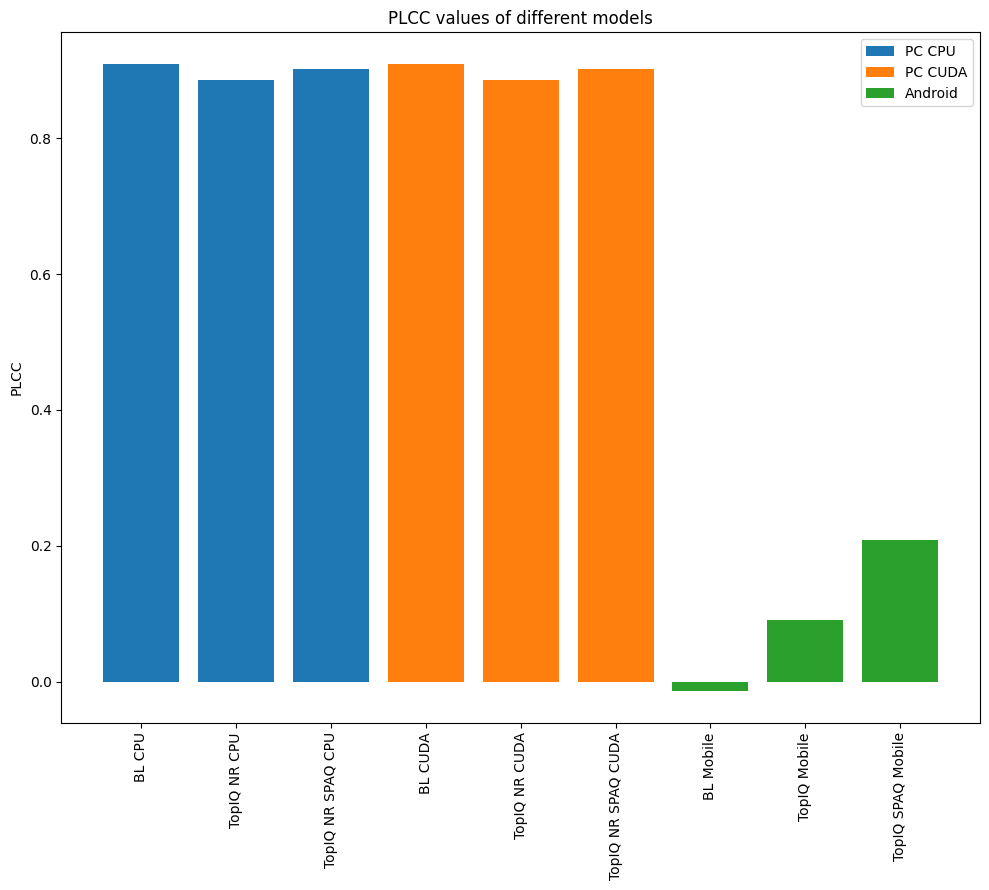

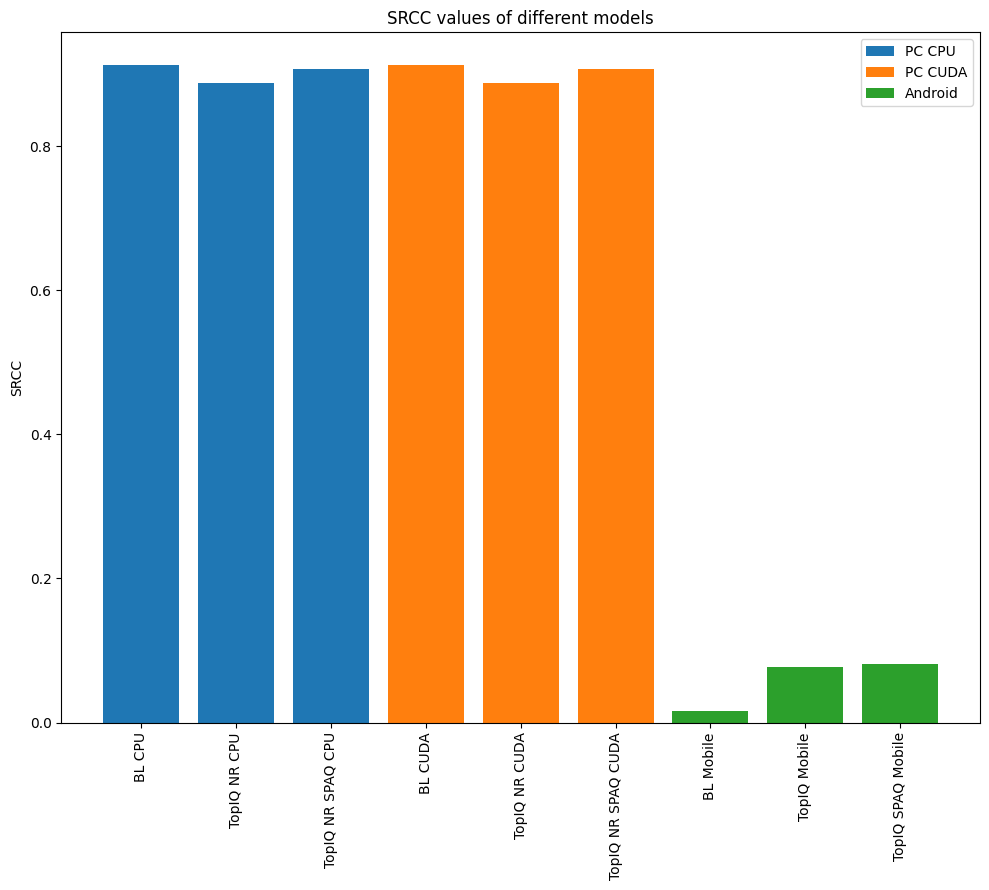

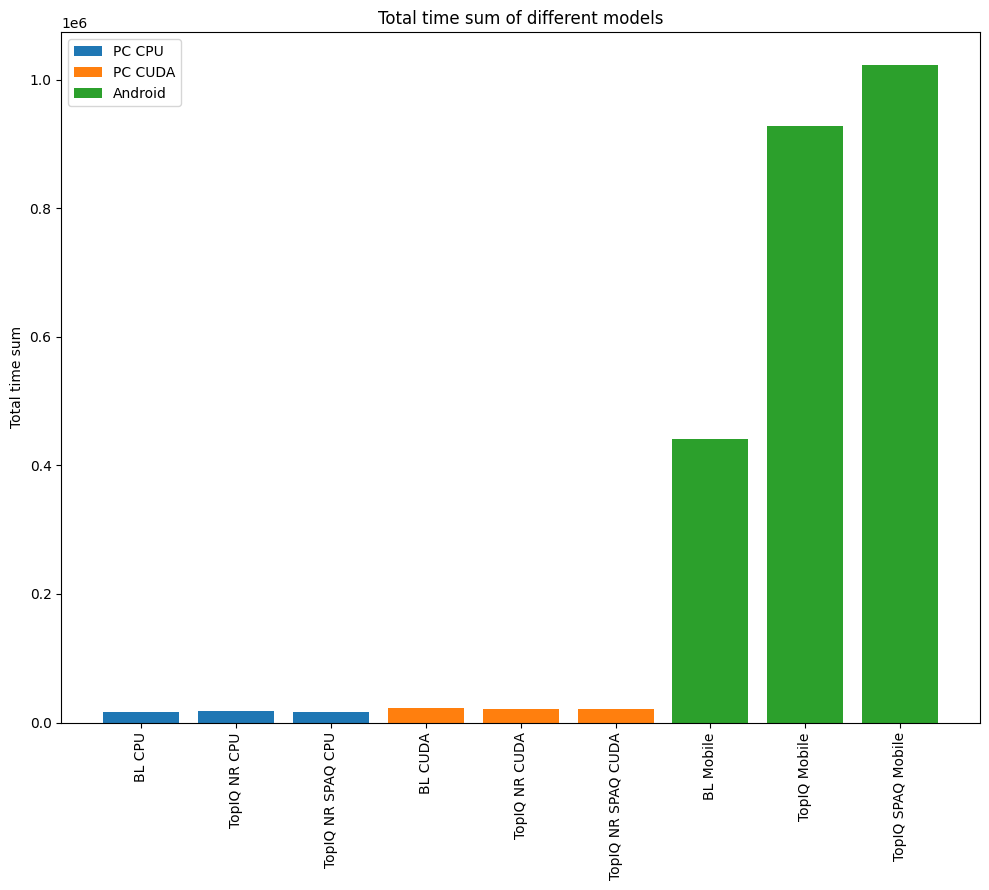

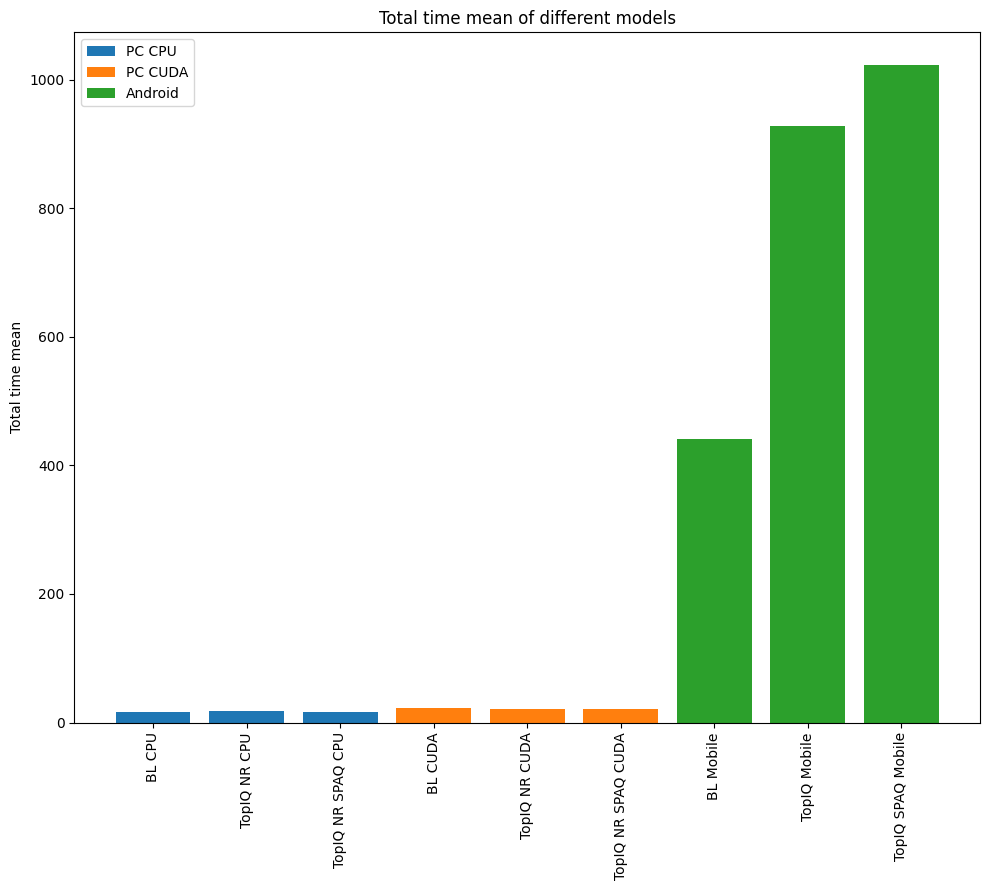

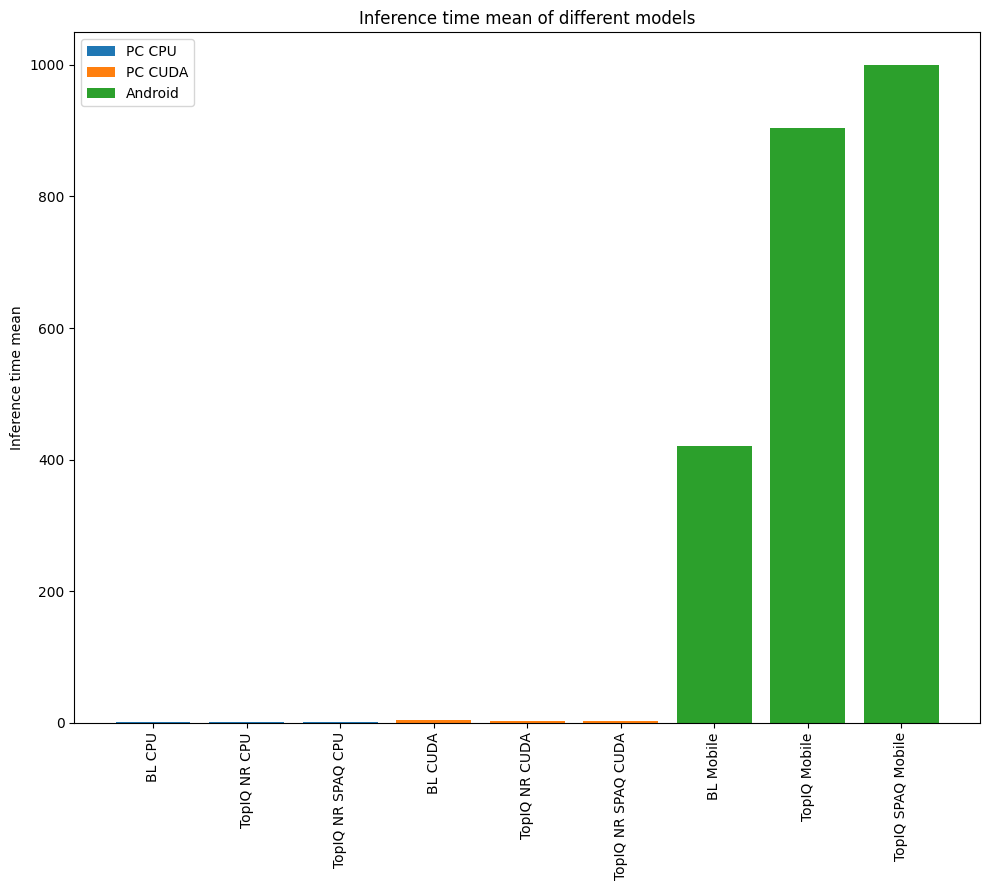

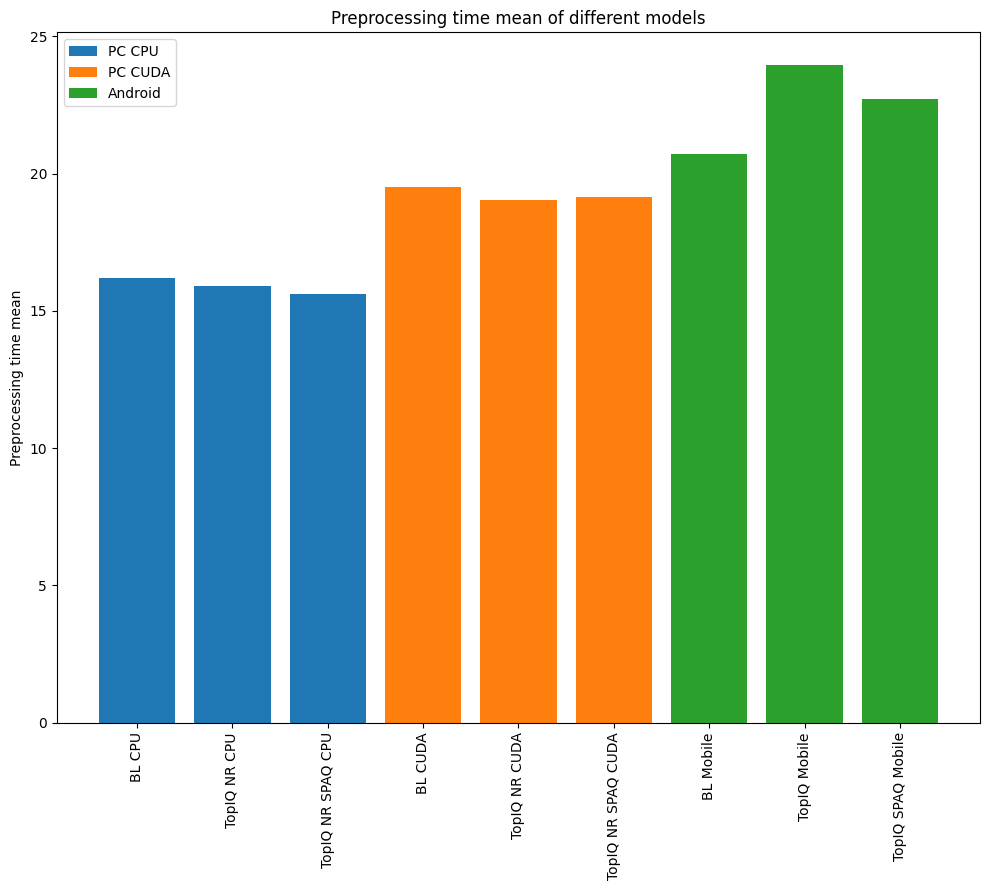

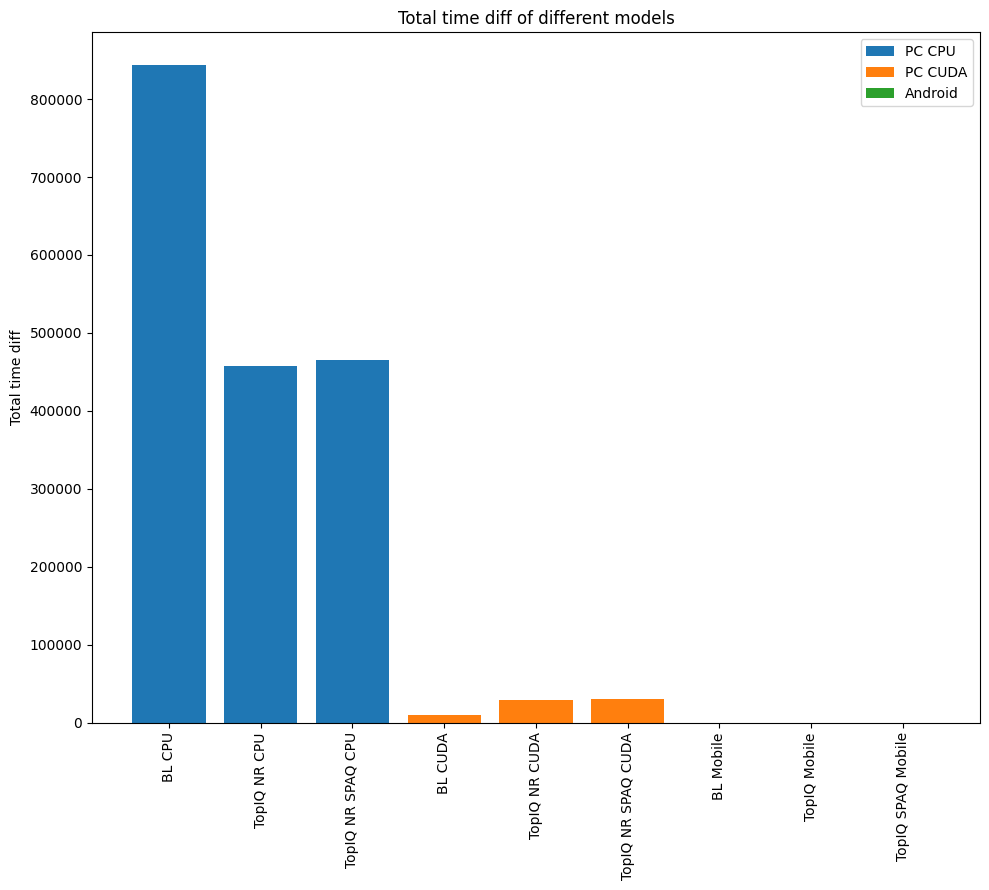

In [117]:
import numpy as np

# Create a bar plot for the PLCC values of different models
fig1, ax1 = plt.subplots(figsize=(10, 9))
ax1.bar(pc_cpu_models, pc_cpu_plcc, label='PC CPU')
ax1.bar(pc_cuda_models, pc_cuda_plcc, label='PC CUDA')
ax1.bar(android_models, android_plcc, label='Android')
# ax1.bar(android_emulated_models, android_emulated_plcc, label='Android Emulated')
ax1.set_ylabel('PLCC')
ax1.set_title('PLCC values of different models')
ax1.legend()
ax1.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Create a bar plot for the SRCC values of different models
fig2, ax2 = plt.subplots(figsize=(10, 9))
ax2.bar(pc_cpu_models, pc_cpu_srcc, label='PC CPU')
ax2.bar(pc_cuda_models, pc_cuda_srcc, label='PC CUDA')
ax2.bar(android_models, android_srcc, label='Android')
# ax2.bar(android_emulated_models, android_emulated_srcc, label='Android Emulated')
ax2.set_ylabel('SRCC')
ax2.set_title('SRCC values of different models')
ax2.legend()
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Create a bar plot for the 'Total time sum' values of different models
fig1, ax1 = plt.subplots(figsize=(10, 9))
ax1.bar(pc_cpu_models, pc_cpu_total_time_sum, label='PC CPU')
ax1.bar(pc_cuda_models, pc_cuda_total_time_sum, label='PC CUDA')
ax1.bar(android_models, android_total_time_sum, label='Android')
# ax1.bar(android_emulated_models, android_emulated_total_time_sum, label='Android Emulated')
ax1.set_ylabel('Total time sum')
ax1.set_title('Total time sum of different models')
ax1.legend()
ax1.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Create a bar plot for the 'Total time mean' values of different models
fig2, ax2 = plt.subplots(figsize=(10, 9))
ax2.bar(pc_cpu_models, pc_cpu_total_time_mean, label='PC CPU')
ax2.bar(pc_cuda_models, pc_cuda_total_time_mean, label='PC CUDA')
ax2.bar(android_models, android_total_time_mean, label='Android')
# ax2.bar(android_emulated_models, android_emulated_total_time_mean, label='Android Emulated')
ax2.set_ylabel('Total time mean')
ax2.set_title('Total time mean of different models')
ax2.legend()
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Create a bar plot for the 'Inference time mean' values of different models
fig3, ax3 = plt.subplots(figsize=(10, 9))
ax3.bar(pc_cpu_models, pc_cpu_inference_time_mean, label='PC CPU')
ax3.bar(pc_cuda_models, pc_cuda_inference_time_mean, label='PC CUDA')
ax3.bar(android_models, android_inference_time_mean, label='Android')
# ax3.bar(android_emulated_models, android_emulated_inference_time_mean, label='Android Emulated')
ax3.set_ylabel('Inference time mean')
ax3.set_title('Inference time mean of different models')
ax3.legend()
ax3.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Create a bar plot for the 'Preprocessing time mean' values of different models
fig4, ax4 = plt.subplots(figsize=(10, 9))
ax4.bar(pc_cpu_models, pc_cpu_preprocessing_time_mean, label='PC CPU')
ax4.bar(pc_cuda_models, pc_cuda_preprocessing_time_mean, label='PC CUDA')
ax4.bar(android_models, android_preprocessing_time_mean, label='Android')
# ax4.bar(android_emulated_models, android_emulated_preprocessing_time_mean, label='Android Emulated')
ax4.set_ylabel('Preprocessing time mean')
ax4.set_title('Preprocessing time mean of different models')
ax4.legend()
ax4.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

# Create a bar plot for the 'Total time diff' values of different models
fig5, ax5 = plt.subplots(figsize=(10, 9))
ax5.bar(pc_cpu_models, pc_cpu_total_time_diff, label='PC CPU')
ax5.bar(pc_cuda_models, pc_cuda_total_time_diff, label='PC CUDA')
ax5.bar(android_models, android_total_time_diff, label='Android')
# ax5.bar(android_emulated_models, android_emulated_total_time_diff, label='Android Emulated')
ax5.set_ylabel('Total time diff')
ax5.set_title('Total time diff of different models')
ax5.legend()
ax5.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
